In [2]:
### Importing of Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay

In [3]:
#### Uploading of Data
df = pd.read_csv('bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Exploratory Data Analysis

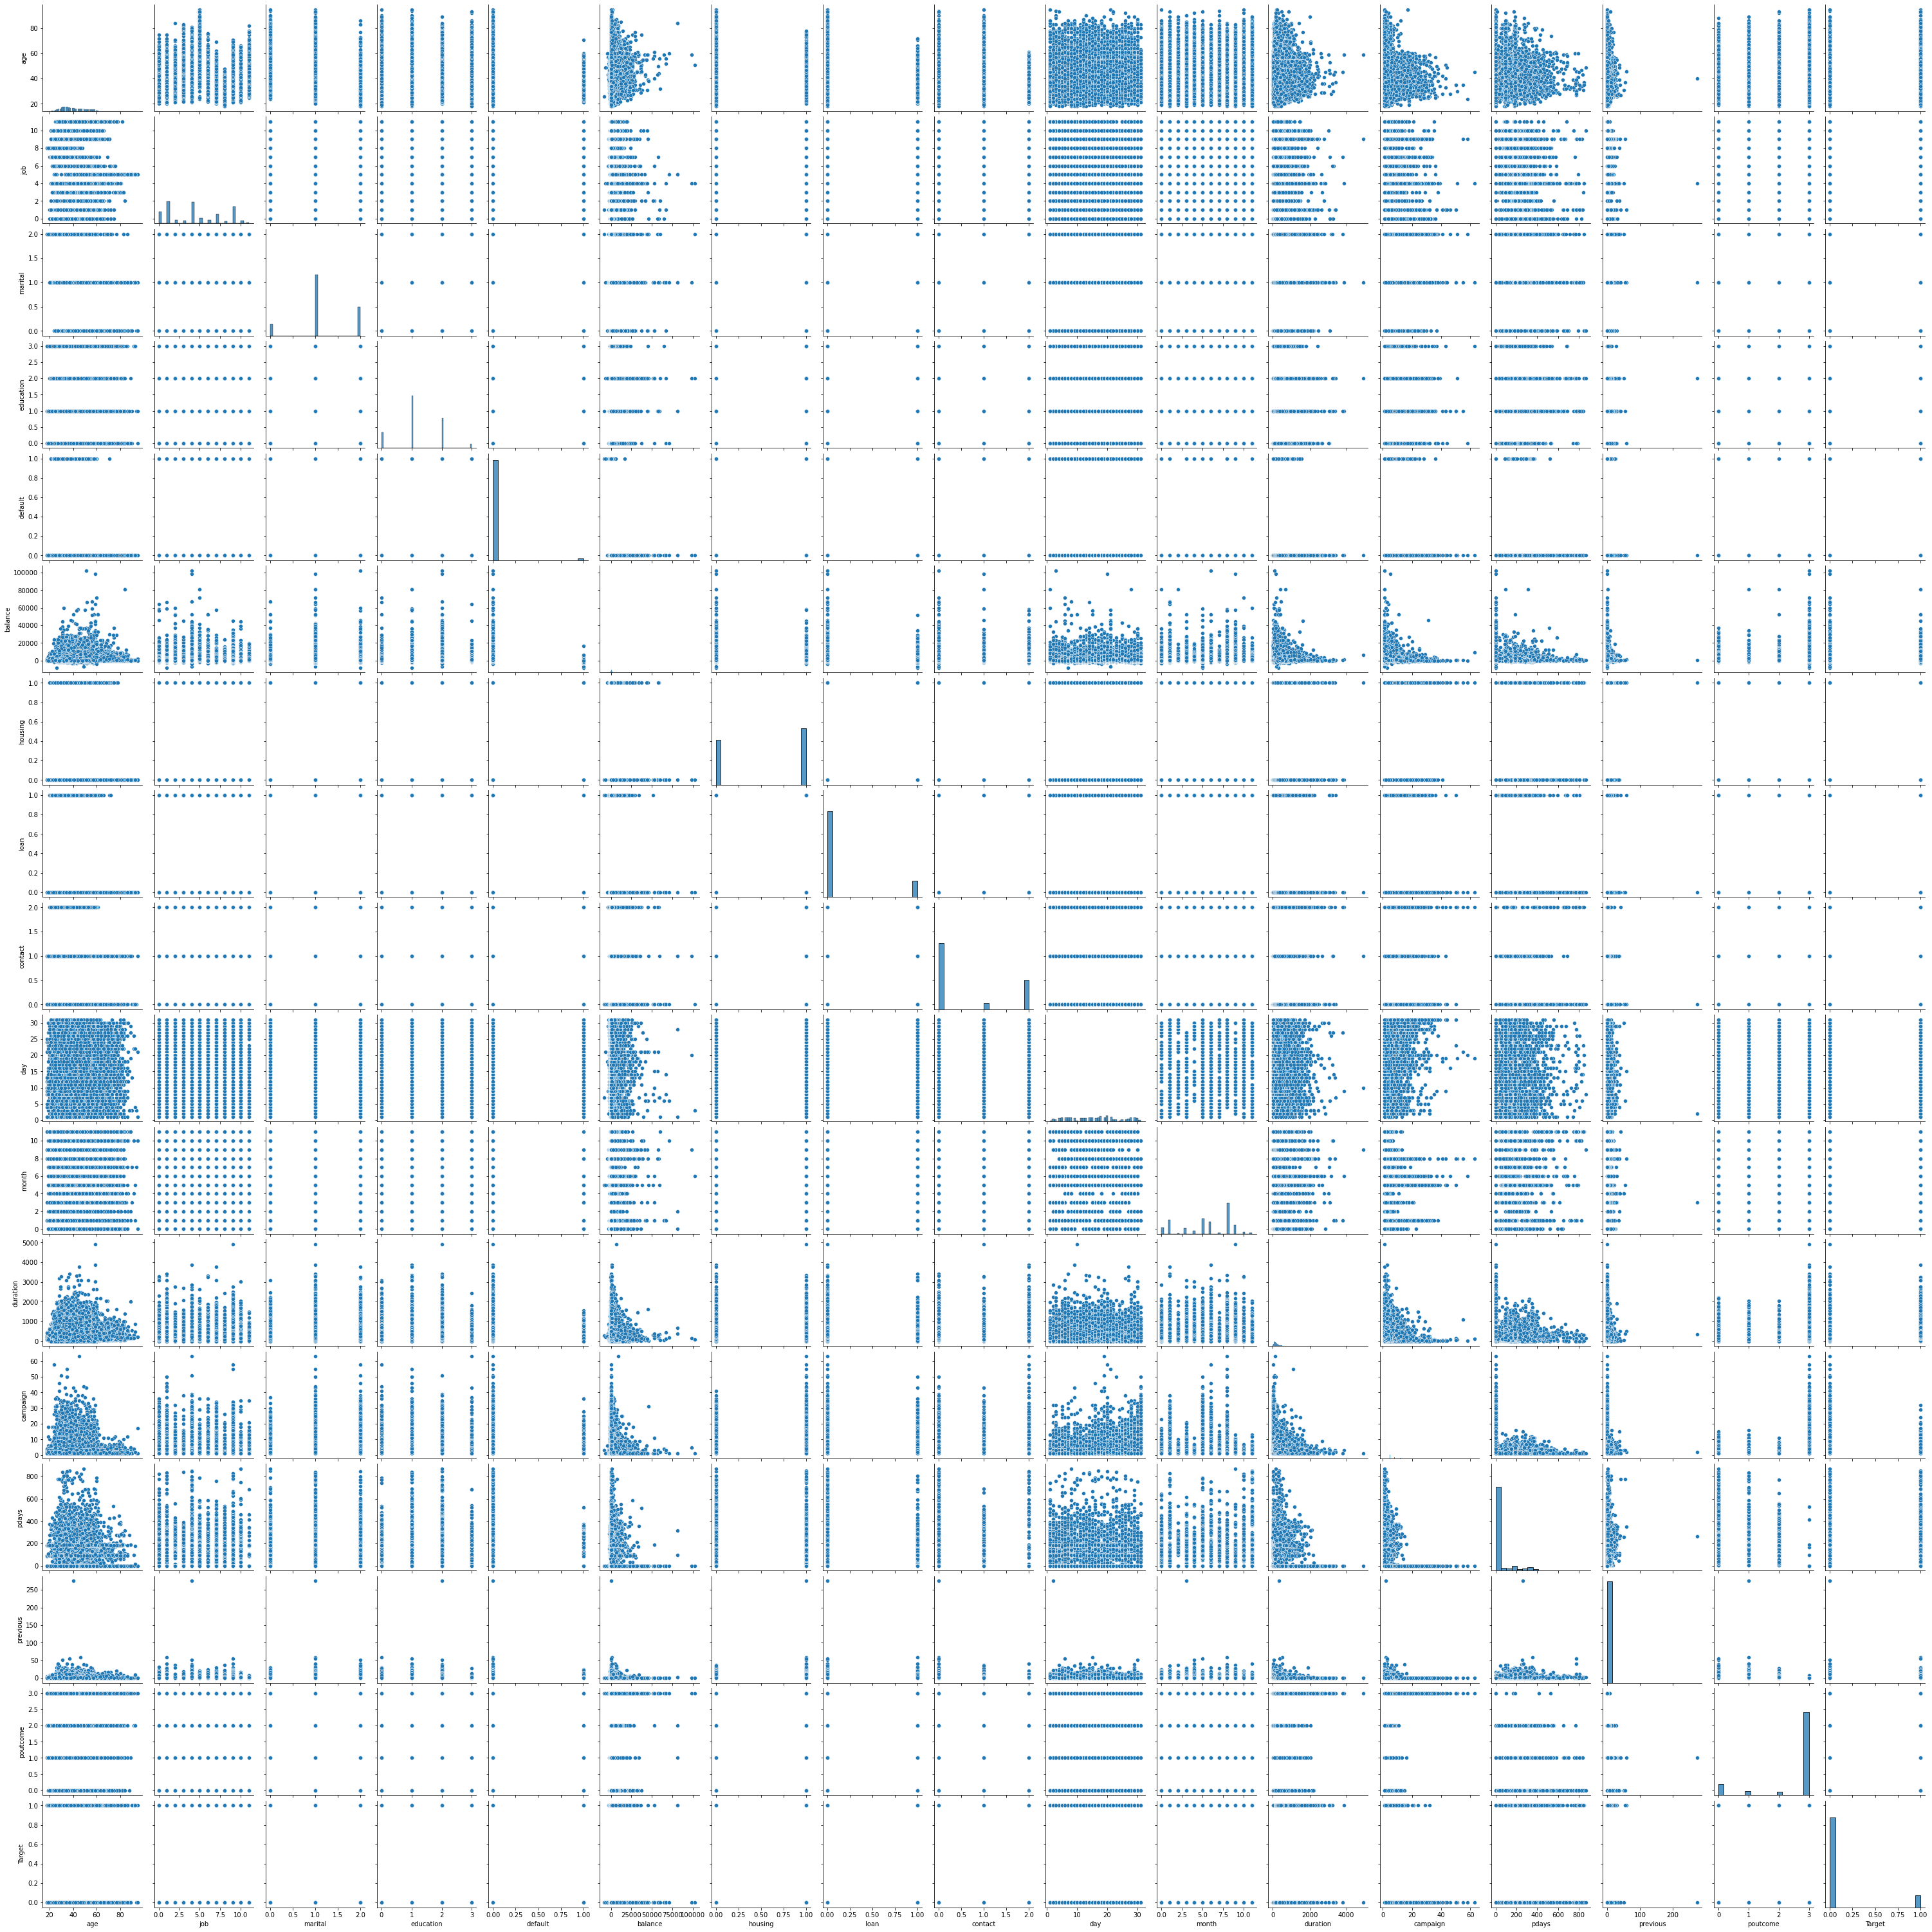

In [43]:
sns.pairplot(df)

<AxesSubplot:xlabel='Target', ylabel='count'>

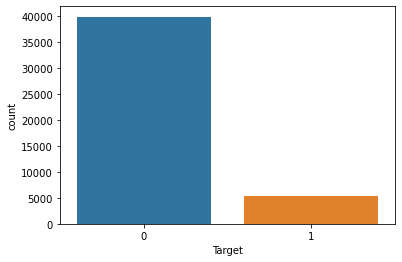

In [45]:
sns.countplot(x =df['Target'])

<AxesSubplot:xlabel='balance', ylabel='Target'>

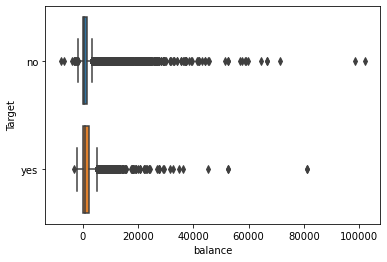

In [5]:
sns.boxplot(x = df['balance'],y = df['Target'])

In [3]:
#### Checking of Rows and Columns
print("The total rows are - ",df.shape[0])
print("The total Columns are - ", df.shape[1])

The total rows are -  45211
The total Columns are -  17


In [4]:
df['Target'].value_counts(normalize=True)*100

no     88.30152
yes    11.69848
Name: Target, dtype: float64

In [5]:
for i in df.columns:
    print(i,":-")
    print(df[i].unique())
    print("===="*25)

age :-
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job :-
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital :-
['married' 'single' 'divorced']
education :-
['tertiary' 'secondary' 'unknown' 'primary']
default :-
['no' 'yes']
balance :-
[ 2143    29     2 ...  8205 14204 16353]
housing :-
['yes' 'no']
loan :-
['no' 'yes']
contact :-
['unknown' 'cellular' 'telephone']
day :-
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month :-
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration :-
[ 261  151   76 ... 1298 1246 1556]
campaign :-
[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41

In [6]:
#### Checking of Unique Values in the Columns
df.apply(lambda x : len(x.unique()))

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [7]:
#### Details about the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [15]:
a = list(df.select_dtypes('object'))
a

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'Target']

In [16]:
from sklearn.preprocessing import LabelEncoder
df[a] = df.select_dtypes('object').apply(LabelEncoder().fit_transform)

In [17]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [19]:
X = df.drop(['Target'],axis = 1)
y = df['Target']

#### Splitting of Data

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((31647, 16), (13564, 16), (31647,), (13564,))

#### Model Building

In [27]:
model = LogisticRegression()
model_train = model.fit(X_train,y_train)
print("The model is fitted and trained")
print("The accuracy of the trained model is - ",model_train.score(X_train,y_train)*100)

The model is fitted and trained
The accuracy of the trained model is -  88.77934717350776


C:\Users\proyas.bose\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Prediction of the Model

In [28]:
prediction  = model_train.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

##### Model Evaluation

In [32]:
cm = confusion_matrix(y_test,prediction, labels = model_train.classes_)
cm

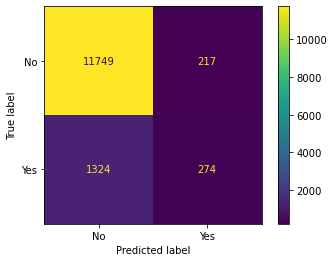

In [38]:
class_labels = ['No','Yes']
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_labels)
disp.plot()
plt.show()

In [42]:
accuracy = accuracy_score(y_test,prediction)*100
print("The accuracy of the Model is  - ",round(accuracy,2), "%")

The accuracy of the Model is  -  88.64 %
